## **Introduction to Regression with Neural Networks in Tensorflow**

There are many definitions for regression problem, but in our case we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [435]:
# import TensorFlow
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

### **Create a data to view and fit**

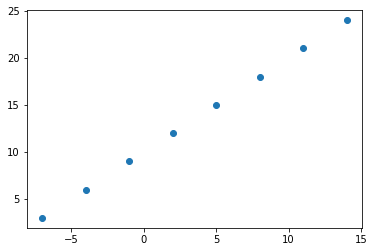

In [436]:
# Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]).reshape(-1, 1)

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]).reshape(-1, 1)

plt.scatter(X, y);

In [437]:
y == X + 10

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### **Input and output shapes**

In [438]:
# One input value is predicting one output
X[0], y[0]

(array([-7.]), array([3.]))

In [439]:
# Turn NumPy arrays into tensors with dtype float 16
X = tf.cast(tf.constant(X), dtype=tf.float16)
y = tf.cast(tf.constant(y), dtype=tf.float16)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float16, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float16)>,
 <tf.Tensor: shape=(8, 1), dtype=float16, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float16)>)

In [440]:
# Check the shapes of an input and output layers
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([1]), TensorShape([1]))

### **Steps in modeling with TensorFlow**

1. **Creating a model** - define `input and output layers`, as well as the `hidden layers` of a deep learning model. 
2. **Compiling a model** - prepare the model to be used with data; define:
    * `loss function` (how wrong the model's predictions are compared to the truth labels),
    * `optimizer` (hot the model should update its internal patterns to better its predictions),
    * `evaluation mertics` (human interpretable values for how well the model is doing).  
3. **Fitting the model** - let the model try to `find patterns` between X & y (features and labels).

In [441]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=['mae']) 

# 3. Fit the model
model.fit(X, y, epochs=5) # epochs is how many times the model will go through all of the training examples

Epoch 1/5
1/1 [==============================] - 0s 207ms/step - loss: 18.2580 - mae: 18.2580
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 17.9767 - mae: 17.9767
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 17.6955 - mae: 17.6955
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 17.4142 - mae: 17.4142
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 17.1330 - mae: 17.1330


In [442]:
# Check out X and Y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float16, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float16)>,
 <tf.Tensor: shape=(8, 1), dtype=float16, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float16)>)

In [443]:
# Try and make a prediction using our model
model.predict([17.0]) # should be 27.0

1/1 [==============================] - 0s 52ms/step


array([[-13.335285]], dtype=float32)

### **Improving the model**

We can improve our model by improving the steps we took to create a model.  
**What can be improved in each step**:
1. **Create a model:**
    * add more `layers`,
    * increase the `number of hidden units` (also caled neurons) within each of the hidden layers,
    * change `activation function` of each layer.
2. **Compiling a model:**
    * change the `optimization function`,
    * change the `learning rate` of optimization function.
3. **Fitting a model:**
    * fit a model for more `epochs` (leave it training for longer)
    * add `more data` (give it more examples to learn from)

**Increasing the number of `epochs`**

In [444]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 221ms/step - loss: 9.5830 - mae: 9.5830
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 9.4505 - mae: 9.4505
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 9.3180 - mae: 9.3180
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 9.1855 - mae: 9.1855
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 9.0530 - mae: 9.0530
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 8.9205 - mae: 8.9205
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.7880 - mae: 8.7880
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 8.6555 - mae: 8.6555
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 8.5230 - mae: 8.5230
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 8.3905 - mae: 8.3905
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 8.258

In [445]:
# Let's see if our model's prediction has improved...
model.predict([17.0]) # should be 27.0

1/1 [==============================] - 0s 49ms/step


array([[29.932919]], dtype=float32)

**Adding `one more hidden layer`, reducing the `number of hidden units` and changing the optimizer to `Adam`**

In [446]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 304ms/step - loss: 12.8716 - mae: 12.8716
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 12.1709 - mae: 12.1709
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 11.4720 - mae: 11.4720
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.7724 - mae: 10.7724
Epoch 5/100
1/1 [==============================] - 0s 998us/step - loss: 10.0671 - mae: 10.0671
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 9.3513 - mae: 9.3513
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.6215 - mae: 8.6215
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 7.8751 - mae: 7.8751
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.1099 - mae: 7.1099
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8072 - mae: 6.8072
Epoch 11/100
1/1 [==============================] - 0s 3ms/step -

In [447]:
# Let's see if our model's prediction has improved...
model.predict([17.0]) # should be 27.0

1/1 [==============================] - 0s 61ms/step


array([[27.481842]], dtype=float32)

### **Evaluating a model**

In practice, a typical workflow when building a neural network is:

```
Build a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> ...
```

When it comes to evaluation there are 3 important words:  
**"Visualise, visualise, visualise"**

It's a good idea to visualise:
* **The data** - what data are we working with? What does it look like?
* **The model itself**- what does a model look like?
* **The training of the model** - how does a model perform while it learns?
* **The predictions of the model** - how do the predictions of a model line up against the ground truth (the original labels)

In [448]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X = tf.reshape(X, shape=(50, 1))
X[:5]

<tf.Tensor: shape=(5, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84]])>

In [449]:
# Make labels for the dataset
y = X + 10
y[:5]

<tf.Tensor: shape=(5, 1), dtype=int32, numpy=
array([[-90],
       [-86],
       [-82],
       [-78],
       [-74]])>

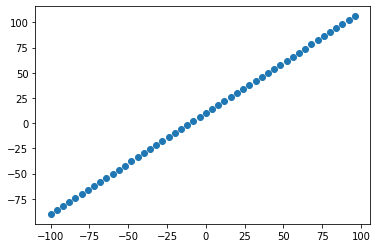

In [450]:
# Visualize the data
plt.scatter(X, y);

### **The 3 sets**

* **Training set** - the model learns from this data (typically 70-80% of the total available data).
* **Validation set** - the model gets tuned on this data (typically 10-15% of the total available data).
* **Test set** - the model gets evaluated on this data to test what it has learned (typically 10-15% of the total available data).

In [451]:
# Check the length of how many samples we have
len(X)

50

In [452]:
# Split the data into train and test set
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40] 

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:] 

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### **Visualizing the data**

Now we've got our data in training and test sets...let's visualize it again!

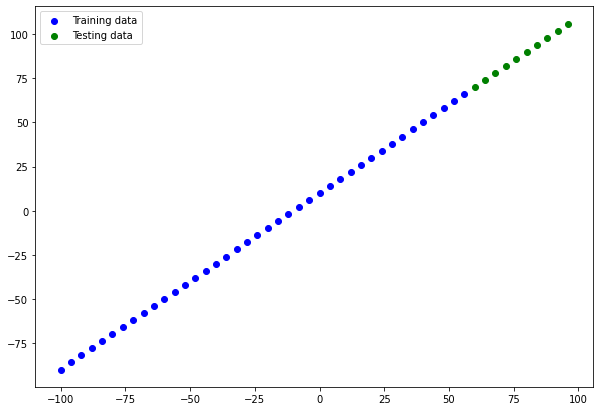

In [453]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot testing data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show a legend
plt.legend();

In [454]:
# Let's have a look at how to build a neural network for our data
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    # input_shape parameter allows model to be built automatically, without fitting it
    tf.keras.layers.Dense(1, name='output_layer')
], name='One_of_many_models...')

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [455]:
model.summary()

Model: "One_of_many_models..."
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable params** - parameters (patterns) the model can update as it trains.
* **Non-trainable params** - parameters which are not updated during training (e.g. when you import model with has already learned parameters and you freeze them).

In [456]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [457]:
# Get a summary of our model
model.summary()

Model: "One_of_many_models..."
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


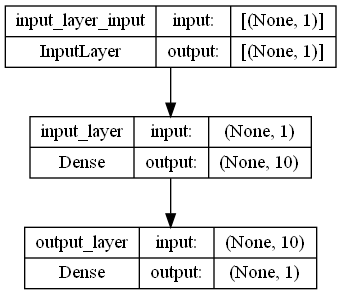

In [458]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### **Visualising model's predictions**

To visualise predictions it's a good idea to plot them against the ground truth labels.

In practise it's often in the form of `y_test` or `y_true` vs `y_pred` (truth vs model's predictions).

In [459]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 38ms/step


array([[ 78.285675],
       [ 83.38629 ],
       [ 88.48689 ],
       [ 93.58751 ],
       [ 98.68811 ],
       [103.78873 ],
       [108.889336],
       [113.989944],
       [119.09055 ],
       [124.19117 ]], dtype=float32)

In [460]:
y_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]])>

In [461]:
# Let's create plotting function
def plot_predictions(train_data = X_train, 
                    train_lables = y_train,
                    test_data = X_test,
                    test_lables = y_test,
                    predictions = y_pred):
    '''Plots training data, test data and compares predictions to ground truth labels'''
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_lables, c='b', label='Training data')
    # Plot testing data in orange
    plt.scatter(test_data, test_lables, c='g', label='Testing data')
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend();

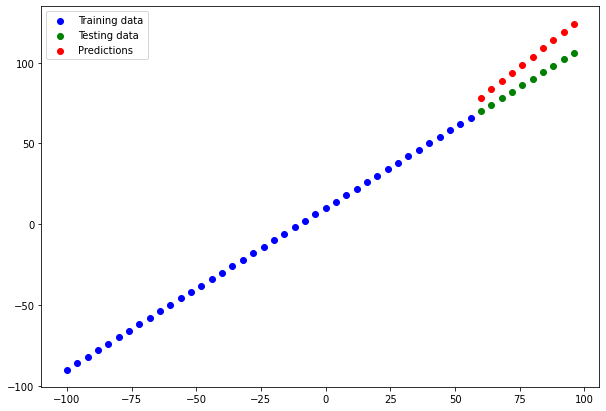

In [462]:
plot_predictions(train_data = X_train, 
                train_lables = y_train,
                test_data = X_test,
                test_lables = y_test,
                predictions = y_pred)

**Trying to get best model possible**

In [463]:
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(100, activation='relu'),
    # input_shape parameter allows model to be built automatically, without fitting it
    tf.keras.layers.Dense(1, name='output_layer')
], name='One_of_many_models...')

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [464]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 42ms/step


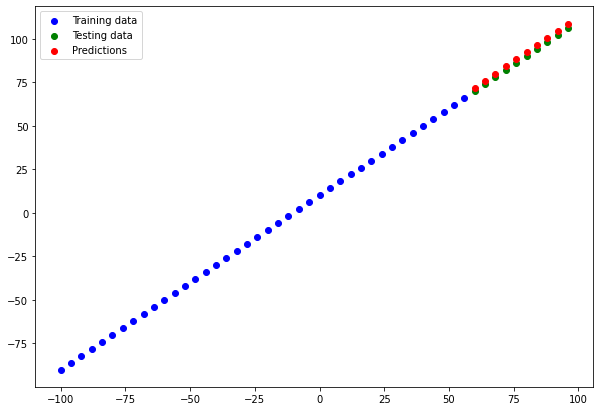

In [465]:
plot_predictions(train_data = X_train, 
                train_lables = y_train,
                test_data = X_test,
                test_lables = y_test,
                predictions = y_pred)

### **Evaluating model's predictions with regression evaluation metrics**

Depending on the problem, there will be different evaluation mertrics to evaluate model's performance.

In this case - **regression problem**, two of the main metrics:
* **MAE** - mean absolute error - "on average how wrong is each of my model's predictions" - most common
* **MSE** - mean squared error - "square of the average errors" - aplifies error value for larger errors
* **Huber** - combination of MAE and MSE - less sensitive to outliers than MSE

In [466]:
# Evaluate the model on the train set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 86ms/step - loss: 2.1824 - mae: 2.1824


[2.1824073791503906, 2.1824073791503906]

In [467]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                    y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.7073288, 1.8132095, 1.9190903, 2.024971 , 2.1308517, 2.2367325,
       2.342575 , 2.446579 , 2.5497742, 2.652977 ], dtype=float32)>

In [468]:
y_pred, y_test

(array([[ 71.70733 ],
        [ 75.81321 ],
        [ 79.91909 ],
        [ 84.02497 ],
        [ 88.13085 ],
        [ 92.23673 ],
        [ 96.342575],
        [100.44658 ],
        [104.549774],
        [108.65298 ]], dtype=float32),
 <tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[ 70],
        [ 74],
        [ 78],
        [ 82],
        [ 86],
        [ 90],
        [ 94],
        [ 98],
        [102],
        [106]])>)

In [469]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=tf.squeeze(y_test), 
                                    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.1824088>

In [470]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=tf.squeeze(y_test), 
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=4.8542657>

In [471]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true = tf.squeeze(y_true), 
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true = tf.squeeze(y_true),
                                        y_pred = tf.squeeze(y_pred))

In [472]:
mae(y_true=tf.squeeze(y_test), 
    y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=2.1824088>

### **Running experiments to improve a model**

1. Get more data.
2. Make a model larger (using more complex model - eg. more layers, more hidden units).
3. Train for longer.

Let's do 3 modeling experimetns:
* `model_1` - same as the original model, trained for 100 epochs
* `model_2` - 2 layers, trained for 100 epochs
* `model_3` - 2 layers, trained for 500 epochs

In [473]:
tf.reshape(X_train, shape=(1,40)) , tf.reshape(y_train, shape=(1,40))

(<tf.Tensor: shape=(1, 40), dtype=int32, numpy=
 array([[-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
          -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
          -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
           32,   36,   40,   44,   48,   52,   56]])>,
 <tf.Tensor: shape=(1, 40), dtype=int32, numpy=
 array([[-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
         -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
          14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
          66]])>)

**Build model_1**  
One dense layer trained for 100 epochs

In [474]:
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])
 # 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 37ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=8.616122>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.74221>)

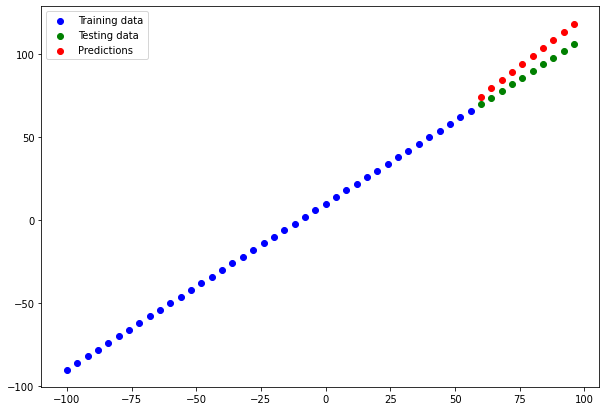

In [475]:
y_preds_1 = model_1.predict(X_test)
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

plot_predictions(predictions=y_preds_1)
mae_1, mse_1

**Build model_2**  
Two dense layers trained for 100 epochs

In [476]:
tf.random.set_seed(42)

# 1. Build a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fit a model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 41ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=11.05604>,
 <tf.Tensor: shape=(), dtype=float32, numpy=130.31828>)

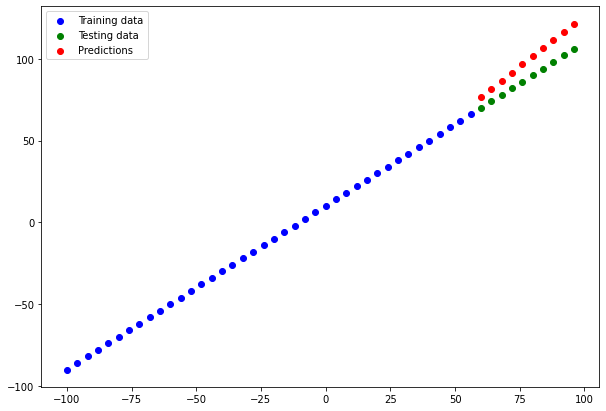

In [477]:
y_preds_2 = model_2.predict(X_test)
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

plot_predictions(predictions=y_preds_2)
mae_2, mse_2

**Build model_3**  
Two dense layers trained for 500 epochs

In [478]:
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fit a model
model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 41ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=67.967026>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4704.053>)

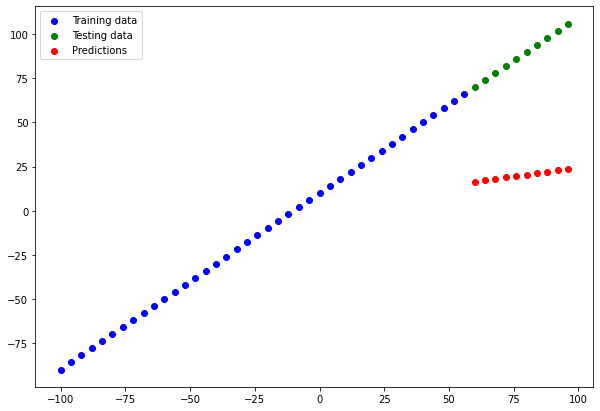

In [479]:
y_preds_3 = model_3.predict(X_test)
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

plot_predictions(predictions=y_preds_3)
mae_3, mse_3

This model is most likely overfitting (was trained for way too long).

🔑 **Note:** You want to stars with small experiments (small models) and make sure they work and then increase their scale when necessary.

### **Comparing the results of experiments**

We've run a few experiments so far, let's compare the results.

In [480]:
# Let's compare our model's results using pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,8.616122,80.742210
1,model_2,11.056040,130.318283
2,model_3,67.967026,4704.053223


Looks like `model_2` performed the best

In [481]:
model_2.summary()

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_167 (Dense)           (None, 10)                20        
                                                                 
 dense_168 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more thing you'll figure out which don't work and in turn, gey closer to figuring work what does work.

### **Tracking your experiments**

One really good habit in machine learning modeling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of TensorFlow library to help trach modeling experiments.
* Weights & Biases - a tool for tracking all kinds of ML experiments (plugs straight into TensorBoard)

### **Saving models**

Saving models allows us to use them outside of the space where they were trained sich as in web application or a mobile app.

There are two main formats we can save our model's to:
1. SavedModel format
2. HDF Format

In [482]:
# Save model using the SavedModel format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [483]:
# Save model using the HDF5 format
model_2.save('best_model_HDF5_format.h5')

### **Loading in a saved model**

In [484]:
# Load in the SavedModel format model
loaded_SaveModel_format = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_SaveModel_format.summary()

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_167 (Dense)           (None, 10)                20        
                                                                 
 dense_168 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [485]:
# Compare model_2 predictions with a loaded model
model_2_preds = model_2.predict(X_test)
loaded_SaveModel_format_preds = loaded_SaveModel_format.predict(X_test)
model_2_preds == loaded_SaveModel_format_preds

1/1 [==============================] - 0s 41ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [486]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_167 (Dense)           (None, 10)                20        
                                                                 
 dense_168 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [487]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 43ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### **A larger example**

In [488]:
# Import required librariest
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [489]:
# Read the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [490]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [491]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [492]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop(columns='charges')
y = insurance_one_hot['charges']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [493]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [494]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [495]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(),
                         metrics=['mae'])

# 3. Fit a model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 784us/step - loss: 8577.2432 - mae: 8577.2432
Epoch 2/100
34/34 [==============================] - 0s 695us/step - loss: 7855.6450 - mae: 7855.6450
Epoch 3/100
34/34 [==============================] - 0s 756us/step - loss: 7561.2231 - mae: 7561.2231
Epoch 4/100
34/34 [==============================] - 0s 846us/step - loss: 7655.2183 - mae: 7655.2183
Epoch 5/100
34/34 [==============================] - 0s 756us/step - loss: 7689.2075 - mae: 7689.2075
Epoch 6/100
34/34 [==============================] - 0s 695us/step - loss: 7612.9331 - mae: 7612.9331
Epoch 7/100
34/34 [==============================] - 0s 725us/step - loss: 7584.4375 - mae: 7584.4375
Epoch 8/100
34/34 [==============================] - 0s 695us/step - loss: 7797.8315 - mae: 7797.8315
Epoch 9/100
34/34 [==============================] - 0s 725us/step - loss: 7621.4497 - mae: 7621.4497
Epoch 10/100
34/34 [==============================] - 0s 846us/step - loss: 7704.7

In [496]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 997us/step - loss: 7260.0874 - mae: 7260.0874


[7260.08740234375, 7260.08740234375]

In [497]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Looks like the model is not performing too well...let's try and improve it

To (try) improve model, we'll run experiments:
1. Add and extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. ...

**First experiment**

In [498]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit a model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 884us/step - loss: 13280.1846 - mae: 13280.1846
Epoch 2/100
34/34 [==============================] - 0s 846us/step - loss: 13118.9844 - mae: 13118.9844
Epoch 3/100
34/34 [==============================] - 0s 846us/step - loss: 12784.1367 - mae: 12784.1367
Epoch 4/100
34/34 [==============================] - 0s 816us/step - loss: 12123.8330 - mae: 12123.8330
Epoch 5/100
34/34 [==============================] - 0s 816us/step - loss: 10999.9844 - mae: 10999.9844
Epoch 6/100
34/34 [==============================] - 0s 846us/step - loss: 9541.8438 - mae: 9541.8438
Epoch 7/100
34/34 [==============================] - 0s 846us/step - loss: 8194.8252 - mae: 8194.8252
Epoch 8/100
34/34 [==============================] - 0s 846us/step - loss: 7535.0186 - mae: 7535.0186
Epoch 9/100
34/34 [==============================] - 0s 846us/step - loss: 7422.6274 - mae: 7422.6274
Epoch 10/100
34/34 [==============================] - 0s 876us/step - lo

In [499]:
# Evaluate the model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 875us/step - loss: 4933.3960 - mae: 4933.3960


[4933.39599609375, 4933.39599609375]

In [500]:
# Previous model results
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7260.0874 - mae: 7260.0874


[7260.08740234375, 7260.08740234375]

**Second experiment**

In [501]:
tf.random.set_seed(42)

# 1. Build a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit a model
history = insurance_model_3.fit(X_train, y_train, 
                                epochs=1000, callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5),
                                verbose=1)

Epoch 1/1000
34/34 [==============================] - 0s 940us/step - loss: 13301.5215 - mae: 13301.5215
Epoch 2/1000
34/34 [==============================] - 0s 786us/step - loss: 13156.2998 - mae: 13156.2998
Epoch 3/1000
34/34 [==============================] - 0s 816us/step - loss: 12840.6260 - mae: 12840.6260
Epoch 4/1000
34/34 [==============================] - 0s 846us/step - loss: 12209.4990 - mae: 12209.4990
Epoch 5/1000
34/34 [==============================] - 0s 876us/step - loss: 11122.7568 - mae: 11122.7568
Epoch 6/1000
34/34 [==============================] - 0s 846us/step - loss: 9669.6729 - mae: 9669.6729
Epoch 7/1000
34/34 [==============================] - 0s 876us/step - loss: 8279.6201 - mae: 8279.6201
Epoch 8/1000
34/34 [==============================] - 0s 876us/step - loss: 7549.4839 - mae: 7549.4839
Epoch 9/1000
34/34 [==============================] - 0s 967us/step - loss: 7415.8115 - mae: 7415.8115
Epoch 10/1000
34/34 [==============================] - 0s 1ms/s

In [502]:
# Evaluate the model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 873us/step - loss: 3457.0964 - mae: 3457.0964


[3457.096435546875, 3457.096435546875]

In [503]:
# Compare with the first model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7260.0874 - mae: 7260.0874


[7260.08740234375, 7260.08740234375]

Text(0.5, 0, 'epochs')

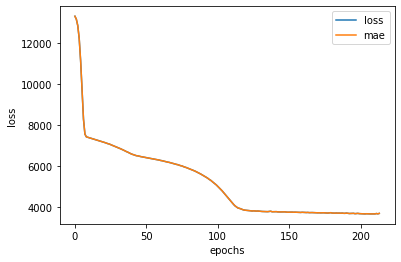

In [504]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

**Question:** How long should you train for?

It depends. It really does...on the problem you're working on. However many people have asked this question before...so TensorFlow has a solution!  
It's called [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

### **Preprocessing data (normalization and standarization)**

In terms of scaling values, **neural networks tend to prefer normalization**.

If you're not sure on which to use, you can try both and see which performs better.

In [505]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance dataframe
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes for Sckit-Learn.

In [506]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn these columns to be between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X & y values
X = insurance.drop(columns='charges')
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [507]:
# What our data looked like in the beggining?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [508]:
# What dose our data looks like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [509]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.  
Now let's build a neural network model on it and see how it goes.

In [563]:
tf.random.set_seed(42)

# 1. Build a model
insurance_model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=['mae'])

# 3. Fit a model
history = insurance_model_4.fit(X_train_normal, y_train,
                    epochs=1000, callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3),
                    verbose=1)

Epoch 1/1000
34/34 [==============================] - 0s 997us/step - loss: 13344.0596 - mae: 13344.0596
Epoch 2/1000
34/34 [==============================] - 0s 1ms/step - loss: 13337.8457 - mae: 13337.8457
Epoch 3/1000
34/34 [==============================] - 0s 907us/step - loss: 13321.6250 - mae: 13321.6250
Epoch 4/1000
34/34 [==============================] - 0s 1ms/step - loss: 13286.5186 - mae: 13286.5186
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 13222.6016 - mae: 13222.6016
Epoch 6/1000
34/34 [==============================] - 0s 937us/step - loss: 13120.4033 - mae: 13120.4033
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 12970.8838 - mae: 12970.8838
Epoch 8/1000
34/34 [==============================] - 0s 1ms/step - loss: 12764.1133 - mae: 12764.1133
Epoch 9/1000
34/34 [==============================] - 0s 1ms/step - loss: 12490.0820 - mae: 12490.0820
Epoch 10/1000
34/34 [==============================] - 0s 997us/ste

In [564]:
# Evaluate insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 2846.1501 - mae: 2846.1501


[2846.150146484375, 2846.150146484375]

Text(0.5, 0, 'epochs')

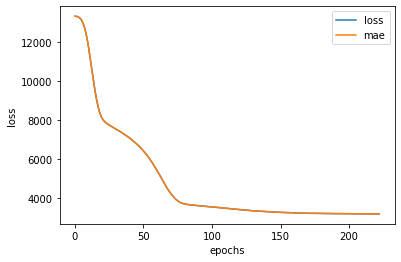

In [565]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')